In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

__Задача 1__

О непрерывной равномерно распределенной случайной величине `B` известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины `B` и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

#### Решение: 

Используем формулу дисперсии для равномерно распределенной случайной величины, чтобы найти правую границу b: 
$$D(X) = \dfrac{(b - a)^2}{12}.$$

$$b = a + \sqrt{12 D(X)} = 0.5 + \sqrt{12 * 0.2} \approx 2.049$$

Среднее же значение равно:

$$M(X) = \dfrac{a + b}{2} = \dfrac{0.5 + 2.049}{2}\approx1.2745.$$

Попробуем построить эмпирическую функцию распределения: 

In [3]:
a = 0.5 
b = 2.049

In [4]:
samples = np.random.uniform(a, b, size=10000)

print(samples)

[1.94048577 1.62528897 1.26780898 ... 0.91446571 0.72510381 1.03690163]


In [5]:
# empirical distribution function

def edf(samples, x: float) -> float:
    return samples[samples < x].shape[0] / samples.shape[0]

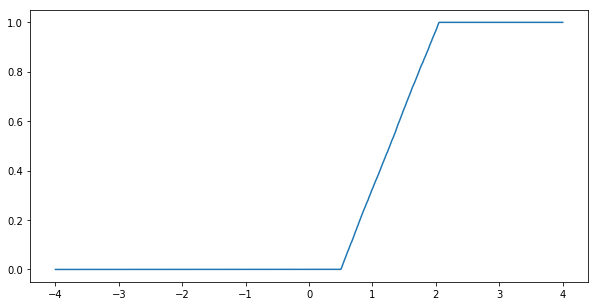

In [8]:
plt.figure(figsize=(10, 5))

ox = np.linspace(-4, 4, 1000)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy);

__Задача 2__

На сколько сигм (средних квадратических отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой `M(X) = 178` и `D(X) = 25`?

#### Решение: 

Будем считать, что рост человека является нормальным распределеним в выбранной популяции. 

Математическое ожидание и дисперсия нормального распределения:

$$M(X) = a, \text{ } D(X) = \sigma^2.$$

$$M(X) = a = 178$$

$$\sigma = \sqrt{D(X)} = \sqrt{25} = 5.$$

Выборку из нормального распределения получим с помощью функции normal из модуля numpy.random. Построим такую выборку с параметрами  $a = 178$ ,  $\sigma = 5$ .

In [48]:
loc = 178
scale = 5
b = 190

In [49]:
samples = np.random.normal(loc, scale, size=1000000)

print(samples)

[182.34591363 181.30801442 182.53085172 ... 173.04844221 184.97039502
 182.79907896]


Эмпирическая функция распределения:

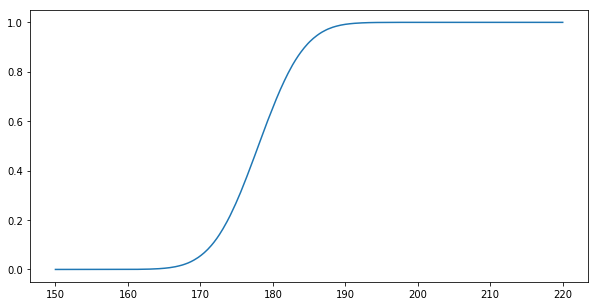

In [50]:
plt.figure(figsize=(10, 5))
ox = np.linspace(150, 220, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy);

Гистограмма выборки и теоретическая функция плотности:

In [51]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

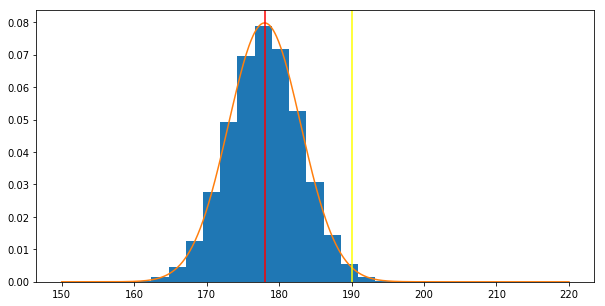

In [52]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b, c='yellow')

In [53]:
samples.mean()

177.99916005419863

In [54]:
samples.var()

24.99820751564423

Для нахождения количества $\sigma$ используем следующую формулу: 

##### $$ x = \dfrac{z - a}{\sigma} = \dfrac{190 - 178}{5} = 2.4 --> 3. $$

То есть человек с ростом в 190 см будет входить в разброс значений минимум по правилу трех сигм.

__Задача 3__

Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. Без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.) посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

#### Решение:
#### Часть 1:

Искомая вероятность $ P(X > 182)$

Среднее значение: $ a = 174 см$, а стандартное отклонение: $\sigma = 8 см$

Используем функцию для нахождения значний плотности вероятности: 

Проведем нормирование данных: 

$$ z = \dfrac{x - a}{\sigma} $$

In [131]:
import math

In [174]:
x1 = 182
a = 174
sig = 8

In [175]:
def normalization(x, a, sig):
    z = (x - a) / sig
    return z

In [176]:
z1 = normalization(x1, a, sig)

print(z1)

1.0


Составим функцию плотности вероятности нормальной стандартизированной случайной величины: 

In [177]:
def pdf_stand(x):
    return math.exp(-x ** 2 / 2) / (math.sqrt(2 * math.pi))

In [178]:
P_x1 = pdf_stand(z1)

P_x1

0.24197072451914337

$$ P(X > 182) \approx 0.24 \approx 24 \% $$

Это хорошо видно на диаграмме ниже, использовась исключительно в учебных целях :)

In [179]:
loc = 174
scale = 8
b = 182
samples = np.random.normal(loc, scale, size=10000)

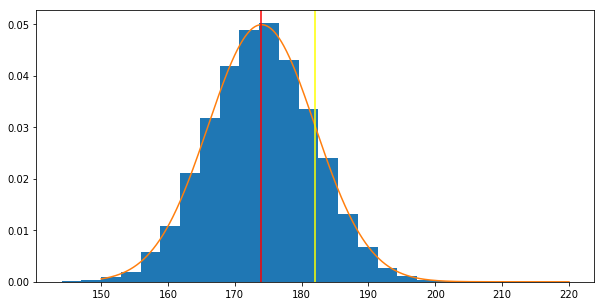

In [180]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b, c='yellow');

#### Часть 2:

Искомая вероятность $ P(X > 190)$

In [181]:
x2 = 190

In [182]:
z2 = normalization(x2, a, sig)

print(z2)

2.0


In [183]:
P_x2 = pdf_stand(z2)

P_x2

0.05399096651318806

$$ P(X > 190) \approx 0.054 \approx 5.4 \% $$

Проверим на графике:

In [184]:
loc = 174
scale = 8
b = 190
samples = np.random.normal(loc, scale, size=10000)

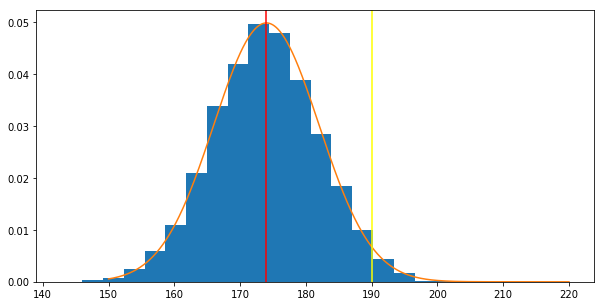

In [185]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b, c='yellow');

#### Часть 3:

###### Искомая вероятность $ P(X \geq 166|X \leq 190)$

Для нахождения вероятности в третьем случае найдем верхнюю и нижнюю границу интервала, вычтем из единицы сумму их значения:

In [186]:
x3 = 166

In [187]:
z3 = normalization(x3, a, sig)

print(z3)

-1.0


In [188]:
P_x3 = pdf_stand(z3)

P_x3

0.24197072451914337

In [189]:
P_3 = 1 - (P_x3 + P_x2)

P_3

0.7040383089676685

$$ P(X \geq 166|X \leq 190) \approx 0.704 \approx 70.4\%$$

Проверим выводты на диаграмме: 

In [190]:
loc = 174
scale = 8
b1 = 166
b2 = 190
samples = np.random.normal(loc, scale, size=10000)

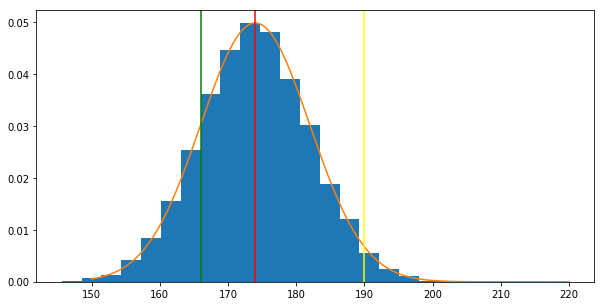

In [191]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b1, c='green');
plt.axvline(x=b2, c='yellow');

#### Часть 4:

###### Искомая вероятность $ P(X \geq 166|X \leq 182)$

In [192]:
P_4 = 1 - (P_x3 + P_x1)

P_4

0.5160585509617133

$$ P(X \geq 166|X \leq 182) \approx 0.516 \approx 51.6\%$$

In [221]:
loc = 174
scale = 8
b1 = 166
b2 = 182
samples = np.random.normal(loc, scale, size=10000)

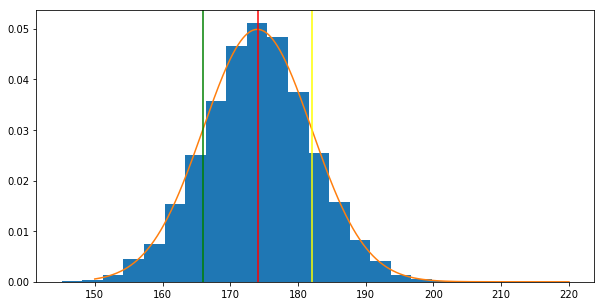

In [222]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b1, c='green');
plt.axvline(x=b2, c='yellow');

#### Часть 5:

###### Искомая вероятность $ P(X \geq 158|X \leq 190)$

In [195]:
x5 = 158 

In [198]:
z5 = normalization(x5, a, sig)

print(z5)

-2.0


In [199]:
P_x5 = pdf_stand(z5)

P_x5

0.05399096651318806

In [201]:
P_5 = 1 - (P_x5 + P_x2)

P_5

0.8920180669736238

$$ P(X \geq 158|X \leq 190) \approx 0.892 \approx 89.2\%$$

In [224]:
loc = 174
scale = 8
b1 = 158
b2 = 190
samples = np.random.normal(loc, scale, size=10000)

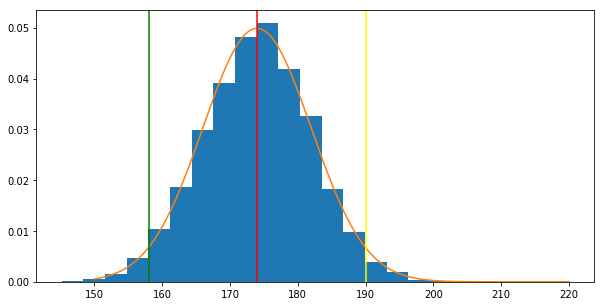

In [225]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b1, c='green');
plt.axvline(x=b2, c='yellow');

#### Часть 6:

In [204]:
x6 = 150

In [205]:
z6 = normalization(x6, a, sig)

print(z6)

-3.0


In [206]:
P_x6 = pdf_stand(z6)

P_x6

0.0044318484119380075

In [207]:
P_6 = P_x2 + P_x6

P_6

0.05842281492512607

$$ P(X \leq 150|X \geq 190) \approx 0.058 \approx 5.8\%$$

In [227]:
loc = 174
scale = 8
b1 = 150
b2 = 190
samples = np.random.normal(loc, scale, size=10000)

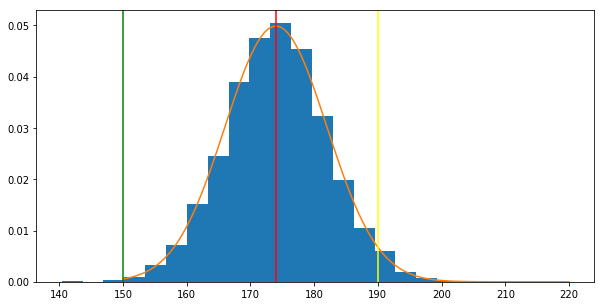

In [228]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b1, c='green');
plt.axvline(x=b2, c='yellow');

#### Часть 7:

In [210]:
x7 = 198 

In [212]:
z7 = normalization(x7, a, sig)

print(z7)

3.0


In [213]:
P_x7 = pdf_stand(z7)

P_x7

0.0044318484119380075

In [214]:
P_7 = P_x6 + P_x7

P_7

0.008863696823876015

$$ P(X \leq 150|X \geq 198) \approx 0.0089 \approx 0.89\%$$

In [230]:
loc = 174
scale = 8
b1 = 150
b2 = 198
samples = np.random.normal(loc, scale, size=10000)

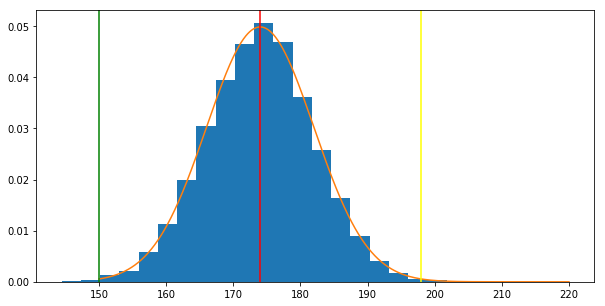

In [231]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b1, c='green');
plt.axvline(x=b2, c='yellow');

#### Часть 8:

In [232]:
P_x3 

0.24197072451914337

$$ P(X \le 166) \approx 0.24 \approx 24\%$$

In [235]:
loc = 174
scale = 8
b = 166
samples = np.random.normal(loc, scale, size=10000)

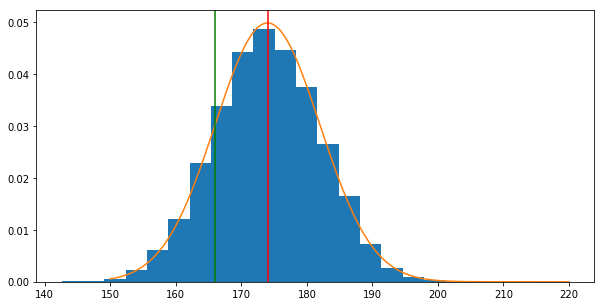

In [236]:
plt.figure(figsize=(10, 5))

oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy);
plt.axvline(x=samples.mean(), c='red')
plt.axvline(x=b, c='green');